In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns



In [2]:
df = pd.read_csv('GE.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-01,6.58,6.82,6.49,6.76,6.727587,75178700
1,2020-06-02,6.90,7.18,6.86,7.05,7.016197,113575400
2,2020-06-03,7.22,7.42,7.18,7.36,7.324710,122819500
3,2020-06-04,7.31,7.75,7.17,7.74,7.702888,125193900
4,2020-06-05,8.45,8.56,7.83,7.88,7.842216,167811600


In [4]:
print(df.shape)

(252, 7)


In [5]:
# convert the dates from text format to the proper date format
train_dates = pd.to_datetime(df['Date'])  

In [6]:
train_dates

0     2020-06-01
1     2020-06-02
2     2020-06-03
3     2020-06-04
4     2020-06-05
         ...    
247   2021-05-24
248   2021-05-25
249   2021-05-26
250   2021-05-27
251   2021-05-28
Name: Date, Length: 252, dtype: datetime64[ns]

In [7]:
# variables for training
cols = list(df)[1:6]

In [8]:
# the dataset used for training (without the date column)
df_for_training = df[cols].astype(float)


In [9]:
df_for_training

,Open,High,Low,Close,Adj Close
0,6.58,6.82,6.49,6.76,6.727587
1,6.90,7.18,6.86,7.05,7.016197
2,7.22,7.42,7.18,7.36,7.324710
3,7.31,7.75,7.17,7.74,7.702888
4,8.45,8.56,7.83,7.88,7.842216
...,...,...,...,...,...
247,13.29,13.31,13.12,13.18,13.180000
248,13.20,13.29,13.10,13.12,13.120000
249,13.12,13.43,13.04,13.40,13.400000
250,13.60,14.40,13.59,14.35,14.350000


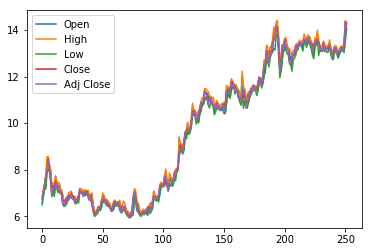

In [10]:
df_for_plot = df_for_training.tail(5000)
df_for_plot.plot.line()

In [11]:
# normalize the dataset, since LSTM uses sigmoid and tanh, values are normalized to avoid problems
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [12]:

len(df_for_training_scaled)

252

In [13]:
trainX = []
trainY = []

In [14]:
# for input to LSTM's trainX and trainY have to be in 3D
n_future = 1
n_past = 14 

In [15]:
for i in range(n_past, len(df_for_training_scaled) - n_future+1):
     trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
     trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])   
        

In [16]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [17]:
trainY

array([[-0.80954348],
       [-0.89895345],
       [-0.92756465],
       [-0.99551623],
       [-1.13857219],
       [-1.0956554 ],
       [-1.1135374 ],
       [-1.06346781],
       [-0.98478703],
       [-1.00982183],
       [-0.96690504],
       [-0.99909263],
       [-1.02412742],
       [-1.02055102],
       [-1.1242666 ],
       [-1.04558582],
       [-1.08134981],
       [-0.92756465],
       [-0.93829384],
       [-0.93829384],
       [-0.95617584],
       [-0.98121063],
       [-0.96332864],
       [-0.93829384],
       [-0.95259944],
       [-1.01697462],
       [-1.06704421],
       [-0.96332864],
       [-1.13857219],
       [-1.22798217],
       [-1.26732256],
       [-1.28162816],
       [-1.25659336],
       [-1.19937098],
       [-1.21367657],
       [-1.16360699],
       [-1.00624543],
       [-1.00624543],
       [-1.1063846 ],
       [-1.1242666 ],
       [-1.07777341],
       [-1.14214859],
       [-1.14930139],
       [-1.19937098],
       [-1.22798217],
       [-1

In [18]:
trainX.shape

(238, 14, 5)

In [19]:
trainY.shape

(238, 1)

In [20]:
from keras.layers import Dropout
\
import tensorflow.keras as keras

In [21]:
# defining the autoencoder model
model = Sequential()
model.add(LSTM(64, activation = 'relu', input_shape = (trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation = 'relu', return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer=keras.optimizers.Adam() , loss ='mse')
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 14, 64)            17920     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(trainX, trainY, epochs=10, batch_size = 16, validation_split = 0.1, verbose=1)

Epoch 1/10
14/14 [==============================] - 38s 151ms/step - loss: 0.6310 - val_loss: 0.1141
Epoch 2/10
14/14 [==============================] - 0s 14ms/step - loss: 0.1052 - val_loss: 0.0270
Epoch 3/10
14/14 [==============================] - 0s 14ms/step - loss: 0.0657 - val_loss: 0.0235
Epoch 4/10
14/14 [==============================] - 0s 17ms/step - loss: 0.0487 - val_loss: 0.0111
Epoch 5/10
14/14 [==============================] - 0s 17ms/step - loss: 0.0579 - val_loss: 0.0166
Epoch 6/10
14/14 [==============================] - 0s 16ms/step - loss: 0.0504 - val_loss: 0.0174
Epoch 7/10
14/14 [==============================] - 0s 18ms/step - loss: 0.0504 - val_loss: 0.0117
Epoch 8/10
14/14 [==============================] - 0s 14ms/step - loss: 0.0404 - val_loss: 0.0097
Epoch 9/10
14/14 [==============================] - 0s 15ms/step - loss: 0.0380 - val_loss: 0.0114
Epoch 10/10
14/14 [==============================] - 0s 14ms/step - loss: 0.0329 - val_loss: 0.0134


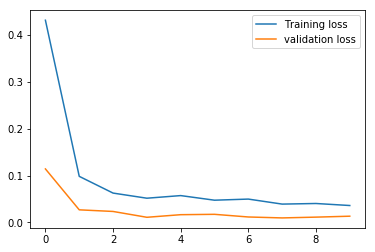

In [23]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()

In [24]:
# forecasting and generating future dates(continuing from the last date of training dataset)

n_future = 25
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='1d')

In [25]:
forecast = model.predict(trainX[-n_future: ])

In [26]:
forecast.shape

(25, 1)

In [27]:
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis = -1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:, 0]

In [28]:
y_pred_future.shape

(25,)

In [29]:
# convert timestamp to dates
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())

In [30]:
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Data'] = pd.to_datetime(df_forecast['Date'])

In [31]:
orignal = df[['Date', 'Open']]


In [32]:
orignal['Date']=pd.to_datetime(orignal['Date'])
orignal = orignal.loc[orignal['Date'] >= '2021-03-28']


/opt/anaconda3/envs/bonus_points2/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/opt/anaconda3/envs/bonus_points2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/envs/bonus_points2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


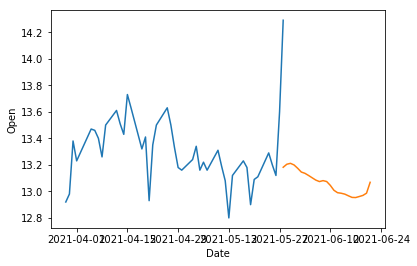

In [33]:
sns.lineplot(orignal['Date'], orignal['Open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])